**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**NOTEBOOK DESCRIPTION**

This notebook will tell us how agglomerative hierarchical clustering, one of the unsupervised machine learning techniques, works and how we can use scipy library to perform it. Agglomerative hiearchical clustering means this is a "bottom-up" approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

# Brief Description About Hierarchical Clustering

Hierarchical Clustering creates clusters in a hierarchical tree-like structure (also called a Dendrogram)  
A pair of clusters are combined until all clusters are merged into one big cluster that contains all the data.

<img src="figures/hierarchical-clustering.gif" width="720" height="720"/>

# Explanation about The Data

We will use Customers.csv file as our dataset. The dataset consists of 3 columns:
> - CustomerID : id of each customer. We use this column when visualizing dendrogram.  
> - Income : customer annual income in thousand USD   
> - SpendingScore : customer spending score, ranges from 0-100 

We are going to use the last two columns as our features to identify clusters in the dataset.

# Let's Code

## Import Packages/Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

## Load/Generate Dataset

In [2]:
df = pd.read_csv('dataset/Customers.csv')
df.head()

,CustomerID,Income,SpendingScore
0,1,15.0,39
1,2,15.0,81
2,3,16.0,6
3,4,16.0,77
4,5,17.0,40


## Quick Look of the Dataset

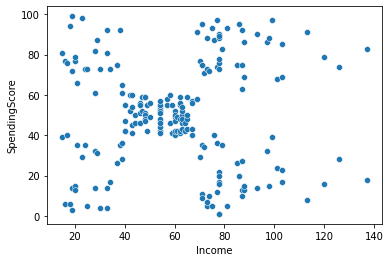

In [3]:
ax = sns.scatterplot(data=df, x='Income', y='SpendingScore')

From the scatter plot above, we can see that there are about 5 clusters in our dataset. One is in the middle and the other are on the each edge of the plot.

## Get Features

In [4]:
X = df.iloc[:, [1, 2]].values
X[:5]

array([[15., 39.],
       [15., 81.],
       [16.,  6.],
       [16., 77.],
       [17., 40.]])

## Create Dendrogram

Using the dendrogram to find the optimal number of clusters.

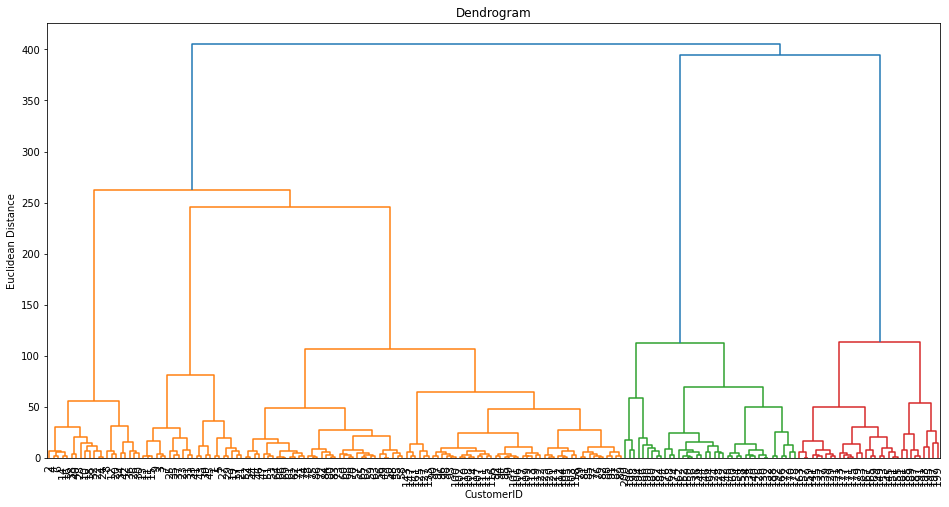

In [5]:
# Create linkage matrix
Z = hierarchy.linkage(X, method='ward')

# plotting dendrogram
fig, ax = plt.subplots(figsize=(16,8))
ax.set(title='Dendrogram', xlabel='CustomerID', ylabel='Euclidean Distance')
dendrogram = hierarchy.dendrogram(Z,
                                  labels=df['CustomerID'].tolist(), 
                                  leaf_font_size=11,
                                  ax=ax)


We will choose threshold = 200 as the distances between clusters are quiet large. Thus we will have 5 clusters since there will be 5 intersection points between the threshold value and the dendrogram. If we choose 300 as our threshold value, then we will have 3 clusters. This is when the machine needs our touch!

## Retrieve Clusters

In [6]:
# retrieve clusters
threshold = 200
clusters = hierarchy.fcluster(Z, threshold, criterion='distance')

## Merge Clusters to Our DataFrame

In [7]:
df['Cluster'] = clusters
df.head()

,CustomerID,Income,SpendingScore,Cluster
0,1,15.0,39,2
1,2,15.0,81,1
2,3,16.0,6,2
3,4,16.0,77,1
4,5,17.0,40,2


## Visualize Clusters

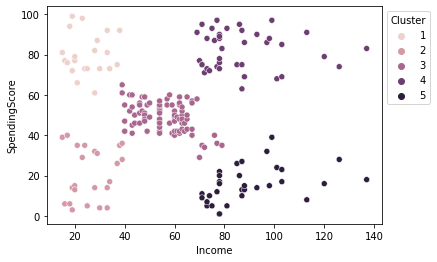

In [8]:
ax = sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster')
ax.legend(bbox_to_anchor=(1,1), loc="upper left", title='Cluster')

As we can see, Hierarchical clustering did a good job to cluster our dataset.